In [61]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [62]:
df = pd.read_csv('red_wine.csv')

In [63]:
profile = ProfileReport(df, title='Red Wine Data Profiling Report', explorative=True)

In [64]:
profile.to_file(output_file='red_wine.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

df = pd.read_csv('red_wine.csv')
X = df.drop('type', axis=1)
y = df['type']

In [66]:
lr = LogisticRegression()
nb = GaussianNB()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ZeroR = DummyClassifier(strategy='most_frequent')
OneR = DecisionTreeClassifier(max_depth=1)

In [67]:
models = [OneR,ZeroR, lr, nb, svm, dt, rf]
model_names = ['One R','Zero R','Logistic Regression', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
accuracy=[]
aucroc=[]

for model, name in zip(models, model_names):
    scores1 = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    scores2 = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    model_names.append((f'{name}:'))
    accuracy.append((f'Accuracy: {scores1.mean():.4f}'))
    aucroc.append((f'AUC-ROC: {scores2.mean():.4f}'))

In [68]:
data_tuples = list(zip(model_names,accuracy,aucroc))
pd.DataFrame(data_tuples, columns=['Model','Accuracy','AUC'])

,Model,Accuracy,AUC
0,One R,Accuracy: 0.7988,AUC-ROC: 0.8026
1,Zero R,Accuracy: 0.5289,AUC-ROC: 0.5000
2,Logistic Regression,Accuracy: 0.7848,AUC-ROC: 0.8799
3,Naive Bayes,Accuracy: 0.8216,AUC-ROC: 0.8954
4,Support Vector Machine,Accuracy: 0.5358,AUC-ROC: 0.8689
5,Decision Tree,Accuracy: 0.7462,AUC-ROC: 0.7453
6,Random Forest,Accuracy: 0.7813,AUC-ROC: 0.8974


In [69]:
rf.fit(X, y)

RandomForestClassifier()

In [70]:
df['type'] = df['type'].replace({'low': 0, 'high': 1})

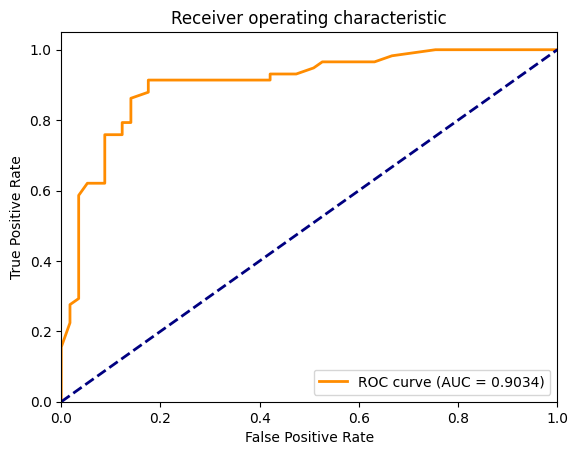

In [71]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('type', axis=1), df['type'], test_size=0.2, random_state=42)

# Fit a Random Forest classifier on the training set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Generate predictions on the testing set
y_pred = rf.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [72]:
import pandas as pd

df = pd.read_csv('white_wine.csv')
print(df.columns)

Index(['citric acid', 'sulphates', 'alcohol', 'type'], dtype='object')


In [51]:
import pandas as pd

# Load the dataset
white_wine = pd.read_csv('white_wine.csv')

# Drop duplicate rows
white_wine = white_wine.drop_duplicates()

In [52]:
# Split the data into features and target variable
X_white = white_wine.drop(['type'], axis=1)
y_white = white_wine['type']


In [53]:
df['type'] = df['type'].replace({'low': 0, 'high': 1})

AUC score:  1.0


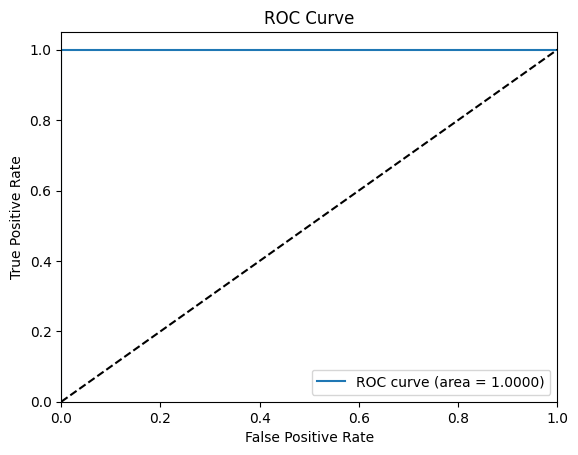

In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('white_wine.csv')

# Convert 'quality' column to binary labels
data['type'] = data['type'].map({'low': 0, 'high': 1})

# Split data into features and labels
X = data.drop('type', axis=1)
y = data['type']

# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Predict probabilities
y_prob = model.predict_proba(X)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y, y_prob)
print("AUC score: ", auc_score)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [60]:
X_white = data.drop('type', axis=1)
y_white = data['type']

scores1 = cross_val_score(rf, X_white, y_white, cv=10, scoring='accuracy')
scores2 = cross_val_score(rf, X_white, y_white, cv=10, scoring='roc_auc')
print(f'Accuracy: {scores1.mean():.4f}')
print(f'AUC-ROC: {scores2.mean():.4f}')

Accuracy: 0.9107
AUC-ROC: 0.9667
